In [12]:
!pip install ripser matplotlib scikit-tda

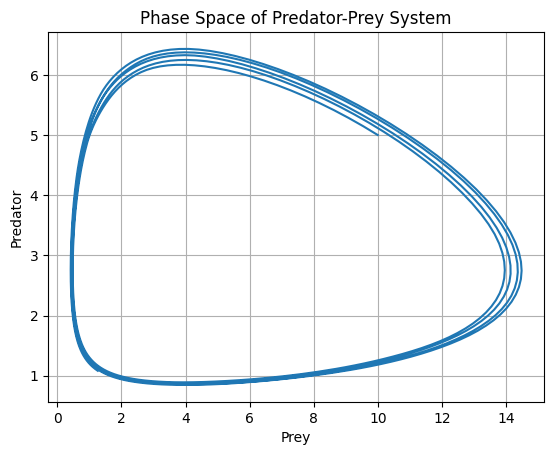

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Lotka–Volterra equations
def lotka_volterra(t, z, alpha=1.1, beta=0.4, gamma=0.4, delta=0.1):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Time points and initial conditions
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)
z0 = [10, 5]

# Solve the system
sol = solve_ivp(lotka_volterra, t_span, z0, t_eval=t_eval)
x, y = sol.y  # x = prey, y = predator

# Make the point cloud (1000 x 2 array)
point_cloud = np.vstack((x, y)).T

# Visualize
plt.plot(point_cloud[:, 0], point_cloud[:, 1])
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("Phase Space of Predator-Prey System")
plt.grid(True)
plt.show()


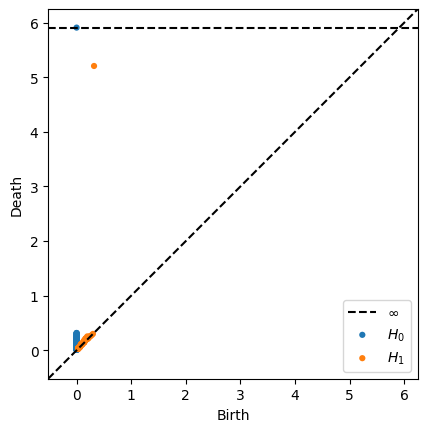

In [14]:
from ripser import ripser
from persim import plot_diagrams

# Compute persistent homology
diagrams = ripser(point_cloud)['dgms']

# Plot the persistence diagram
plot_diagrams(diagrams, show=True)


In [16]:
from ripser import ripser
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Compute persistent homology
rips_results = ripser(point_cloud)
diagrams = rips_results['dgms']

# Extract the H1 (loops) persistence data
H1_lifetimes = diagrams[1][:, 1] - diagrams[1][:, 0]  # Death - Birth
longest_loop_idx = np.argmax(H1_lifetimes)  # Index of longest-lived cycle

# Get the birth-death pair of the longest cycle
birth, death = diagrams[1][longest_loop_idx]
print(f"Longest loop birth: {birth}, death: {death}")


Longest loop birth: 0.31965911388397217, death: 5.205561637878418


In [20]:
from scipy.spatial.distance import pdist, squareform

# Compute pairwise distances
distance_matrix = squareform(pdist(point_cloud))

# Find point pairs that contributed to the longest-lived loop
epsilon_range = (birth, death)  # The range where the loop existed

# Create graph edges for points whose distances fall in this range
G = nx.Graph()
num_points = len(point_cloud)

for i in range(num_points):
    for j in range(i + 1, num_points):
        if epsilon_range[0] <= distance_matrix[i, j] <= epsilon_range[1]:
            G.add_edge(i, j)

# Extract largest connected component (which should be the loop)
largest_cc = max(nx.connected_components(G), key=len)
loop_points = np.array([point_cloud[i] for i in largest_cc])



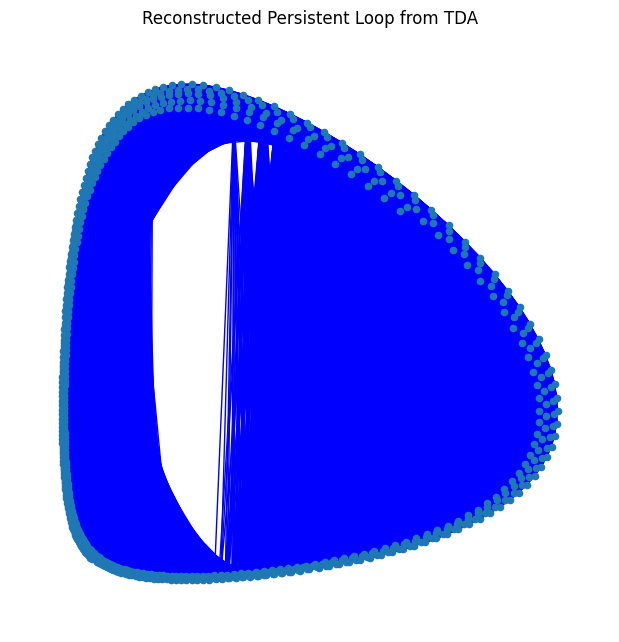

In [21]:
plt.figure(figsize=(6, 6))
nx.draw(G, pos={i: point_cloud[i] for i in G.nodes}, with_labels=False, node_size=20, edge_color='blue')
plt.title("Reconstructed Persistent Loop from TDA")
plt.show()


In [24]:
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.linear_model import LinearRegression

# Compute numerical derivatives
dt = t[1] - t[0]  # Time step
dx_dt = np.gradient(x, dt)  # Approximate dx/dt
dy_dt = np.gradient(y, dt)  # Approximate dy/dt

# Prepare the dataset for regression
X = np.column_stack([x, x * y])  # Predictor variables for dx/dt
Y = np.column_stack([x * y, y])  # Predictor variables for dy/dt

# Fit linear regression models
model_dx = LinearRegression().fit(X, dx_dt)
model_dy = LinearRegression().fit(Y, dy_dt)

# Extract parameters
a, b = model_dx.coef_
c, d = model_dy.coef_

print(f"Estimated parameters:")
print(f"a = {a:.4f}, b = {b:.4f}")
print(f"c = {c:.4f}, d = {d:.4f}")


Estimated parameters:
a = 1.1024, b = -0.4008
c = 0.0999, d = -0.3974


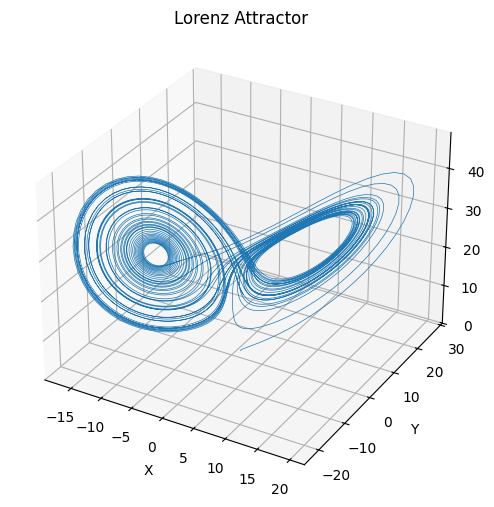

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Lorenz system
def lorenz(t, state, sigma=10, beta=8/3, rho=28):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Time settings
t_span = (0, 50)
t_eval = np.linspace(*t_span, 5000)  # More points for better resolution

# Initial conditions
initial_state = [1, 1, 1]

# Solve the system
sol = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)
x, y, z = sol.y  # Extract trajectories

# Plot the Lorenz attractor in 3D
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.show()


In [26]:
from scipy.spatial.distance import pdist, squareform

# Create delay-embedded data (6D)
delay = 5  # Number of time steps for delay
embedded_data = np.column_stack([x[:-delay], y[:-delay], z[:-delay],
                                 x[delay:], y[delay:], z[delay:]])

print("Embedded data shape:", embedded_data.shape)  # Should be (N-delay, 6)


Embedded data shape: (4995, 6)


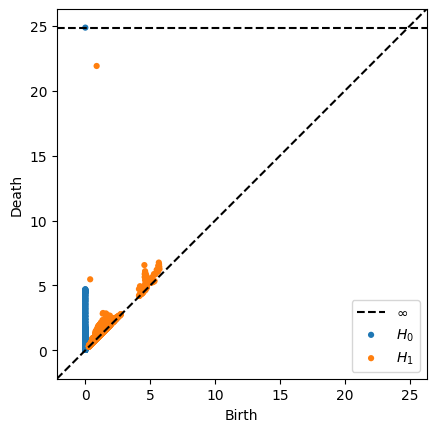

In [27]:
from ripser import ripser
from persim import plot_diagrams

# Compute persistent homology on the 6D delay-embedded data
diagrams = ripser(embedded_data)['dgms']

# Plot persistence diagram
plot_diagrams(diagrams, show=True)


             Dim_0        Dim_1        Dim_2        Dim_3        Dim_4  \
count  4995.000000  4995.000000  4995.000000  4995.000000  4995.000000   
mean     -1.984376    -1.984870    24.152172    -1.984526    -1.984694   
std       7.800952     8.785223     8.098709     7.800895     8.785288   
min     -16.736146   -21.822198     0.961760   -16.736146   -21.822198   
25%      -8.120157    -8.168346    17.777821    -8.120157    -8.168346   
50%      -2.975525    -2.437307    24.199646    -2.975525    -2.437307   
75%       2.900399     2.904343    29.907978     2.900399     2.904343   
max      19.592902    27.234921    47.936086    19.592902    27.234921   

             Dim_5  
count  4995.000000  
mean     24.167111  
std       8.069673  
min       0.963884  
25%      17.777821  
50%      24.199646  
75%      29.907978  
max      47.936086  


<Axes: >

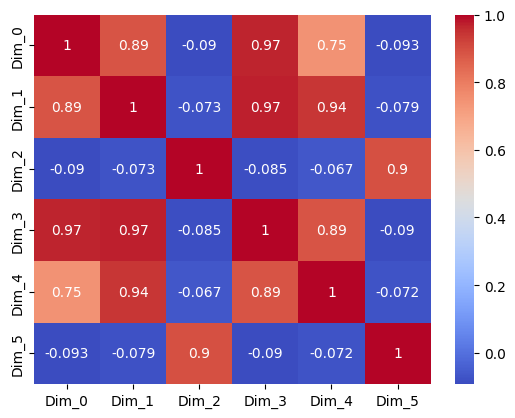

In [30]:
import pandas as pd

df = pd.DataFrame(embedded_data, columns=[f'Dim_{i}' for i in range(6)])
print(df.describe())  # Summary statistics

import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')



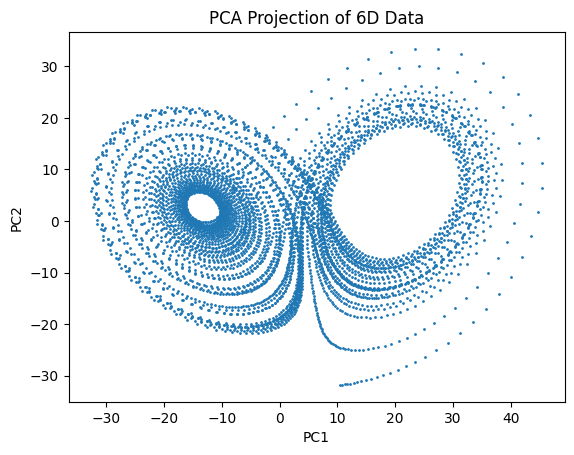

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_data = pca.fit_transform(embedded_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], s=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of 6D Data")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


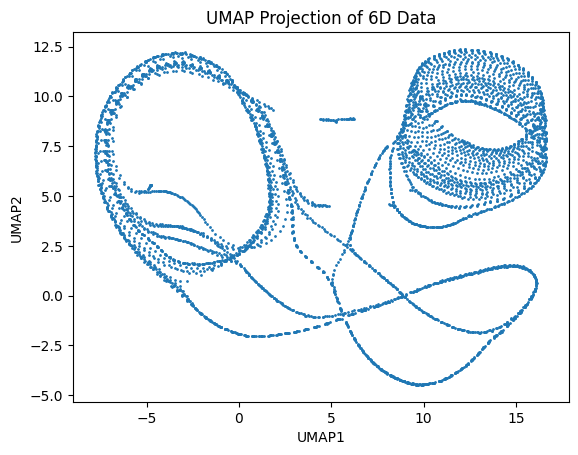

In [32]:
from umap import UMAP

umap = UMAP(n_components=2)
umap_data = umap.fit_transform(embedded_data)

plt.scatter(umap_data[:, 0], umap_data[:, 1], s=1)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP Projection of 6D Data")
plt.show()


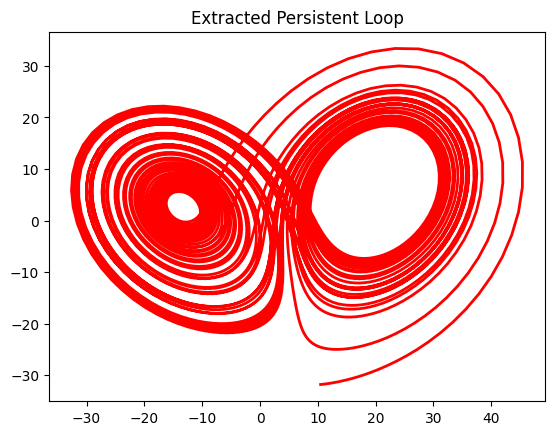

In [33]:
import networkx as nx
from scipy.spatial.distance import pdist, squareform

# Compute pairwise distances
distance_matrix = squareform(pdist(embedded_data))

# Threshold for connecting points (use birth-death range from persistent homology)
birth, death = diagrams[1][np.argmax(diagrams[1][:, 1] - diagrams[1][:, 0])]

# Create a graph connecting points that were involved in the loop
G = nx.Graph()
num_points = len(embedded_data)

for i in range(num_points):
    for j in range(i + 1, num_points):
        if birth <= distance_matrix[i, j] <= death:
            G.add_edge(i, j)

# Extract the largest connected component (this should be the loop)
largest_cc = max(nx.connected_components(G), key=len)
loop_points = np.array([embedded_data[i] for i in largest_cc])

# Visualize the loop in PCA space
loop_pca = pca.transform(loop_points)
plt.scatter(pca_data[:, 0], pca_data[:, 1], s=1, alpha=0.1)  # Background
plt.plot(loop_pca[:, 0], loop_pca[:, 1], 'r-', lw=2)  # Loop in red
plt.title("Extracted Persistent Loop")
plt.show()


In [37]:
import pysindy as ps

sindy_model = ps.SINDy()
sindy_model.fit(embedded_data, t=dt)  # dt = your time step
sindy_model.print()


AttributeError: module 'numpy' has no attribute 'math'